In [79]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
# read the dataset
dataset = pd.read_csv(r'A:\Python\Datasets\MNIST\data_MNIST.csv')

In [81]:
print(len(dataset))

42000


In [82]:
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
print(len(dataset))

42000


In [110]:
len(dataset.columns)

785

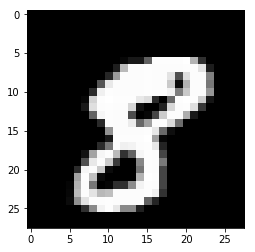

In [245]:
plt.imshow(dataset.iloc[10,1:785].values.reshape(28,28), cmap = 'gray')

In [85]:
# splitting data into train and test
from sklearn.model_selection import train_test_split
X = dataset.iloc[:,1:]
X = X/255
y = dataset.iloc[:,:1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state =20)

In [181]:
#using MLP model for fitting
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', activation='relu',hidden_layer_sizes=(500,))
clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [182]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy' , accuracy_score(y_test, y_pred))
print('Confusion matrix:\n\n', confusion_matrix(y_test, y_pred))

Accuracy 0.9727380952380953
Confusion matrix:

 [[806   0   2   1   0   2   4   1   0   1]
 [  0 964   2   0   1   0   0   3   4   0]
 [  1   3 797   4   1   0   3   4   6   0]
 [  0   1   7 875   0   2   0   3   4   4]
 [  1   3   1   0 743   0   4   0   1   6]
 [  1   2   1   6   2 741   5   0  11   6]
 [  3   1   0   0   1   4 796   0   3   0]
 [  3   4   4   1   4   0   0 828   1   8]
 [  2   5   5  10   3   3   3   2 786   4]
 [  3   1   0   5  10   5   0   8   9 835]]


### Using the model predict my paint diagram
### I have drawn a 7 on paint

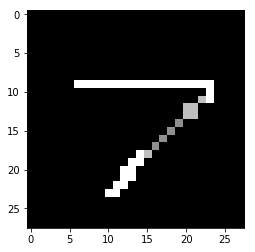

In [270]:

from PIL import Image
image = Image.open(r'C:\Users\91880\Desktop\7.png')
plt.imshow(image)

In [271]:
import cv2
image = cv2.imread(r'C:\Users\91880\Desktop\image.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [272]:
gray_array = np.asarray(gray)   

In [273]:
gray_array = gray_array/255

In [274]:
final_list = {}
pixel = 0
for rows in gray_array:
    for pixel_value in rows:
        a = 'pixel' + str(pixel)
        final_list[a]= pixel_value
        pixel = pixel + 1

In [275]:
df = pd.DataFrame.from_dict(final_list, orient='index').T

In [276]:
df.shape

(1, 784)

In [278]:
prediction = clf.predict(df)

In [279]:
print('the prediction is : ', prediction)

the prediction is :  [7]


In [1]:
## REFERENCES
# Machine Learning by Andrew NG - coursera
# Skymind: multilayer perceptron